In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
import operator
import re
import calendar
from collections import Counter
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 9,5
plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

In [2]:
data = pd.read_pickle('master_VGC22')

In [3]:
data

,Console,CriticScore,Date,Developer,Game,Id,JAP,NA,Other,PAL,Publisher,Total,UserScore,VGCScore
0,Wii,NAN,19th Nov 06,Nintendo EAD,Wii Sports,1,29.02,82.65,3.77,41.36,Nintendo,NAN,7.7,NAN
1,NES,NAN,18th Oct 85,Nintendo EAD,Super Mario Bros.,2,3.58,40.24,6.81,29.08,Nintendo,NAN,10,NAN
2,Wii,8.7,27th Apr 08,Nintendo EAD,Mario Kart Wii,3,12.92,35.9,3.8,15.84,Nintendo,9.1,8.2,NAN
3,Wii,8.8,26th Jul 09,Nintendo EAD,Wii Sports Resort,4,10.98,32.9,3.29,15.61,Nintendo,8.8,8,NAN
4,GB,NAN,30th Sep 98,Game Freak,Pok�mon Red / Green / Blue Version,5,8.89,31.37,10.22,11.27,Nintendo,NAN,9.4,NAN
5,GB,NAN,01st Jun 89,Bullet Proof Software,Tetris,6,2.26,30.26,4.22,23.2,Nintendo,NAN,NAN,NAN
6,DS,NAN,15th May 06,Nintendo EAD,New Super Mario Bros.,7,9.19,29.85,6.5,11.28,Nintendo,8.1,9.1,NAN
7,Wii,5.3,12th Feb 07,Nintendo EAD,Wii Play,8,9.18,28.92,2.93,13.96,Nintendo,4.5,5.9,NAN
8,Wii,9.1,15th Nov 09,Nintendo EAD,New Super Mario Bros. Wii,9,7,28.5,4.7,14.53,Nintendo,9.1,8.6,NAN
9,NES,NAN,15th Oct 85,Nintendo R&D1,Duck Hunt,10,0.63,28.31,0.28,26.93,Nintendo,NAN,NAN,NAN


In [4]:
data['WW'] = [sum([float(i) for i in k]) for k in data[['JAP','NA','Other','PAL']].values]

In [5]:
def clean_date(date):
    try:
        dmy = re.split(' ',date)
        d = int(dmy[0][:-2])
        nametonum = {v: k for k,v in enumerate(calendar.month_abbr)}
        m = nametonum[dmy[1]]
        if dmy[2][0] == '0':
            y = int('20'+dmy[2])
        else:
            y = int('19'+dmy[2])
        return d,m,y
    except:
        return None,None,None
cdate = [clean_date(date) for date in list(data.Date)]
data['Day'],data['Month'],data['Year']=zip(*cdate)

In [6]:
iiigen = data[data.Year < 1993]
iiigen = iiigen[iiigen.Year > 1983]
cons = ['5200','7800', 'ACPC', 'AST', 'Aco', 'Amig', 'Arc', 'BBCM', 'BRW', 'C128', 'C64', 'MS', 'MSX', 'NES', 'PCE', 'TG16', 'ZXS']
iiigen = iiigen[iiigen.Console.isin(cons)]

devs_in_time = {}
for c in set(iiigen.Console):
    devs_in_time[c] = []    
    consdf = iiigen[iiigen.Console == c]
    mint = min(consdf.Year)
    maxt = max(consdf.Year)
    devs_in_time[c] = [len(set(consdf[consdf.Year == y].Developer)) for y in range(1983,1989)]

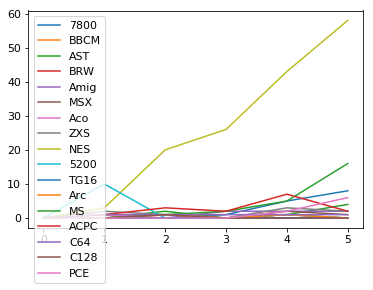

In [7]:
for i in devs_in_time.keys():
    plt.plot(devs_in_time[i],label=i)
plt.legend(loc=2)
plt.show()
    

In [8]:
#get total games released by developer for first 11 years (for all consoles)
totaldf = {}

datan = data[data.Year > 1972]

for c in set(datan.Console):
    nes = datan[datan.Console == c]
    
    #get rid of None years
    yrs = list(nes.Year)
    mint = min(yrs)
    if mint == None:
        mint = 0
    maxt = max(yrs)

    nesdev = pd.DataFrame.from_dict(Counter(nes.Publisher),orient='index')#,index=range(len(set(nes.Developer))))

    nesdev = nesdev.sort_values(by=0,ascending=False)

    nesdevn = {str(i):[] for i in nesdev.index}

    for n in nesdevn.keys():
        nesn = nes[nes.Publisher == n]
        tot = [len(set(nesn[nesn.Year == y].Game)) for y in range(mint,mint+11)]
        ww = [i for i in list(nesn.WW) if i > 0]
        totaldf[len(totaldf)] = [c]+[n]+tot+[sum(tot),sum(ww)]
tdf = pd.DataFrame.from_dict(totaldf,orient='index')
tdf.columns = ['Console','Publisher']+[str(i) for i in range(1,12)]+['Releases','Sold']
tdf = tdf.sort_values(by='Releases',ascending=False)


In [9]:
home_console = [u'CD32', u'SAT', u'7800', u'GC', u'S32X', u'GEN', u'2600',
                u'FDS', u'PS2', u'PS3', u'PS4', u'PCE', u'PS', u'SCD', u'TG16',
                u'SNES', u'XOne', u'Odys', u'MS', u'NES', u'N64',
                u'NG', u'NS', u'XB', u'CDi', u'WiiU', u'3DO',u'DC',
                u'Ouya', u'X360', u'AJ',
                u'5200', u'BBCM', u'Wii']
generations = {1:[u'Odys'],
              2:[u'2600'],
              3:[u'7800',u'MS',u'NES'],
              4:[u'PCE',u'SCD',u'TG16',u'GEN',u'SNES',u'NG',u'CDi'],
              5:[u'CD32',u'SAT',u'S32X',u'PS',u'N64',u'3DO'],
              6:[u'GC',u'PS2',u'XB',u'DC'],
              7:[u'PS3',u'X360',u'Wii'],
              8:[u'PS4',u'XOne',u'WiiU',u'NS',u'Ouya']}

In [10]:
for g in range(1,9):
    d = data[data.Console.isin(generations[g])]
    print 'Generation '+str(g)
    print 'N '+str(len(d))
    print 'Platforms '+str(len(generations[g]))
    print 'Games '+str(len(d))
    print 'Publishers '+str(len(set(d.Publisher)))
    print 'Developers '+str(len(set(d.Developer)))
    print 'S.W. Sales '+str(sum([float(i) for i in d.WW if i > 0]))
    print '\n\n'

Generation 1
N 0
Platforms 1
Games 0
Publishers 0
Developers 0
S.W. Sales 0



Generation 2
N 500
Platforms 1
Games 500
Publishers 49
Developers 93
S.W. Sales 0



Generation 3
N 1494
Platforms 3
Games 1494
Publishers 132
Developers 348
S.W. Sales 414.25



Generation 4
N 2868
Platforms 7
Games 2868
Publishers 239
Developers 633
S.W. Sales 266.12



Generation 5
N 4140
Platforms 6
Games 4140
Publishers 401
Developers 1048
S.W. Sales 927.32



Generation 6
N 5866
Platforms 4
Games 5866
Publishers 350
Developers 1159
S.W. Sales 1361.04



Generation 7
N 5269
Platforms 3
Games 5269
Publishers 336
Developers 1134
S.W. Sales 3491.73



Generation 8
N 2979
Platforms 5
Games 2979
Publishers 477
Developers 810
S.W. Sales 1240.96





In [11]:
len(data)

52732

In [ ]:
pub = {}
for i in data.Publisher:
    dpub = data[data.]
    pub[i]

In [39]:
def get_developer_behavior(include_this,g='Not specified'):
    nes = tdf[tdf.Console.isin(include_this)]

    print 'Results for generation '+str(g)
    
 #table head
    print str(len(nes[nes.Releases > 20]))+' firms with more than 20 releases'
    print str(len(nes[nes.Releases.isin(range(5,20))]))+' firms between 5 and 20'
    print str(len(nes[nes.Releases < 5]))+' firms with less than 5 releases\n\n'

 #statistics
    print nes.describe()
    


 #plot correlation and regression between Releases and Units sold
    sns.jointplot('Releases','Sold',data=nes,kind="reg")
    plt.show()

 #plot game release distribution   
    plt.bar(np.arange(1,104),[len(nes[nes.Releases == i]) for i in np.arange(1,104)],width=1)
    plt.xlabel('Releases')
    plt.ylabel('Frequency')
    plt.title('Game release distribution')
    plt.show()
    
 #same plot under loglog scale
    plt.scatter(np.arange(1,104),[len(nes[nes.Releases == i]) for i in np.arange(1,104)])
    plt.plot([len(nes[nes.Releases == i]) for i in np.arange(1,104)],c='w',linewidth=0)
    plt.title('Log-log plot of game releases')
    plt.loglog()
    plt.show()

 #plot the yearly amount of releases by category (>20,5-20,<5)
    avg = []
    print sum(list(nes.Releases))
    for k in nes[nes.Releases > 20].values:
        avg.append(k[2:12])

    avgar = np.array(avg, dtype=np.float64)

    avg20 = np.average(avgar, axis=0)
    plt.plot(avg20,label='> 20',c='r')

    #stdev = np.std(avgar, axis=0)
    #plt.plot(map(lambda x,y: x+y,avg,stdev),'--',label='> 20',c='r')
    #plt.plot(map(lambda x,y: x-y,avg,stdev),'--',label='> 20',c='r')

    avg = []
    for k in nes[nes.Releases.isin(range(5,20))].values:
        avg.append(k[2:12])
    avgar = np.array(avg)
    plt.plot(np.average(avgar, axis=0),label='20 - 5')

    avg = []
    for k in nes[nes.Releases < 5].values:
        avg.append(k[2:12])
    avgar = np.array(avg)
    plt.plot(np.average(avgar, axis=0),label='< 5')

    plt.legend(loc=1)
    plt.xlabel('Platform years')
    plt.ylabel('Releases')
    plt.xticks(np.arange(0,10),np.arange(1,11))
    plt.title('Game releases by firm category')
    plt.show()
    
    return avg20

Results for generation 2
3 firms with more than 20 releases
16 firms between 5 and 20
27 firms with less than 5 releases


               1          2          3          4          5          6  \
count  47.000000  47.000000  47.000000  47.000000  47.000000  47.000000   
mean    0.212766   0.957447   0.042553   0.212766   0.425532   3.085106   
std     1.196665   5.241795   0.291730   0.883082   1.425615   4.614862   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   5.000000   
max     8.000000  35.000000   2.000000   5.000000   6.000000  18.000000   

               7          8          9         10         11    Releases  Sold  
count  47.000000  47.000000  47.000000  47.000000  47.000000   47.000000  47.0  
mean    3.787234   0.510638   0.021277 

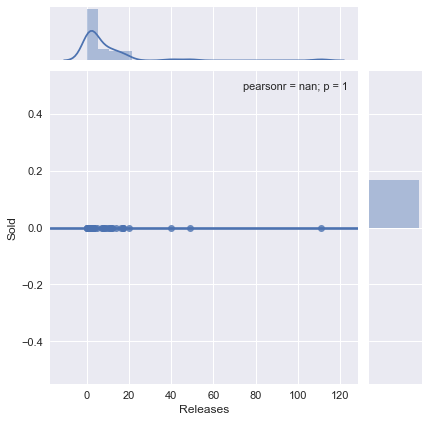

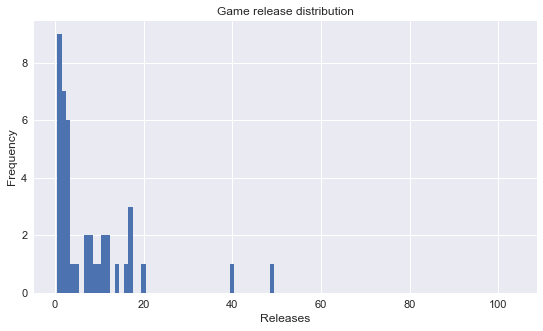

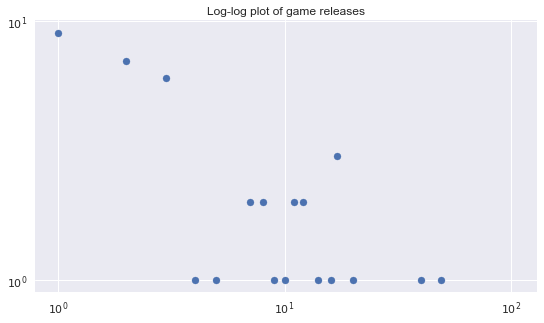

446


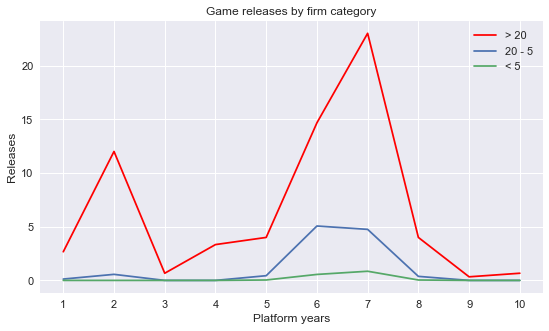

Results for generation 3
15 firms with more than 20 releases
49 firms between 5 and 20
81 firms with less than 5 releases


                1           2           3           4           5           6  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.062069    0.324138    0.634483    0.786207    1.000000    0.986207   
std      0.444420    2.535533    3.229237    3.857147    2.927361    2.590008   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
max      4.000000   26.000000   31.000000   43.000000   23.000000   20.000000   

                7           8           9          10          11    Releases  \
count  145.000000  145.000000  145.000000  145.000000  145.000000

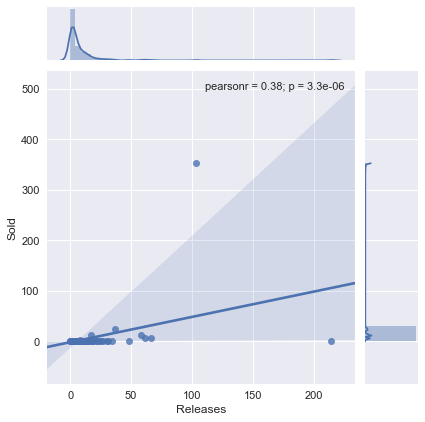

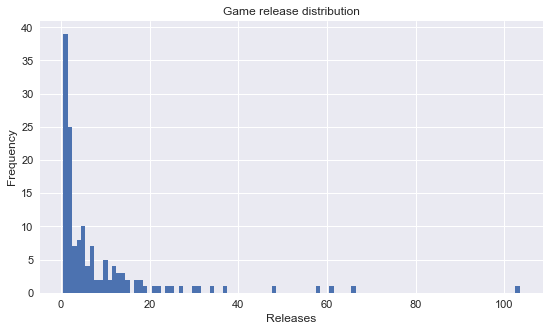

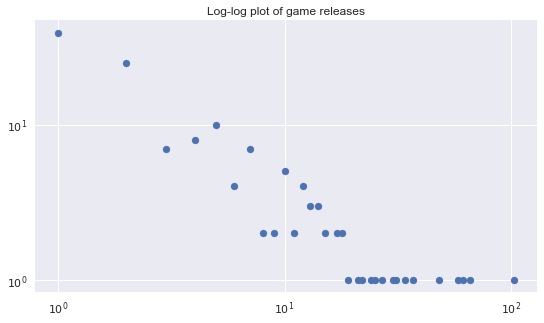

1420


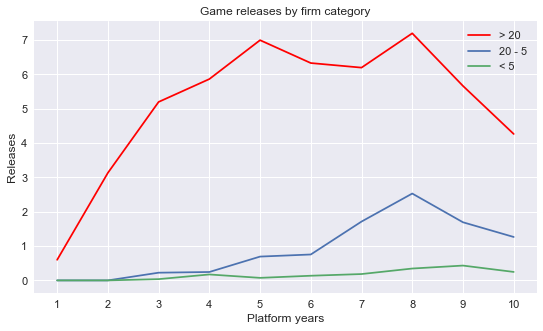

Results for generation 4
25 firms with more than 20 releases
110 firms between 5 and 20
257 firms with less than 5 releases


                1           2           3           4           5           6  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean     0.073791    0.066158    0.218830    0.496183    0.656489    0.880407   
std      0.876071    0.718345    1.250694    2.253254    2.578673    2.663711   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
max     17.000000   12.000000   20.000000   26.000000   28.000000   35.000000   

                7           8           9          10          11    Releases  \
count  393.000000  393.000000  393.000000  393.000000  393.0000

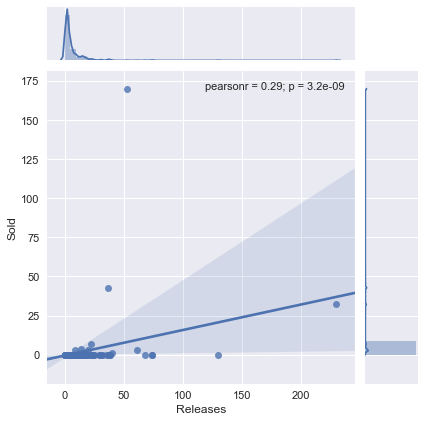

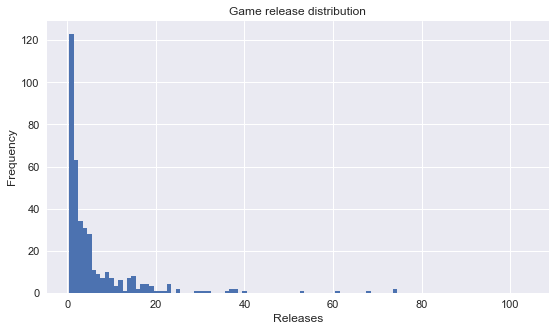

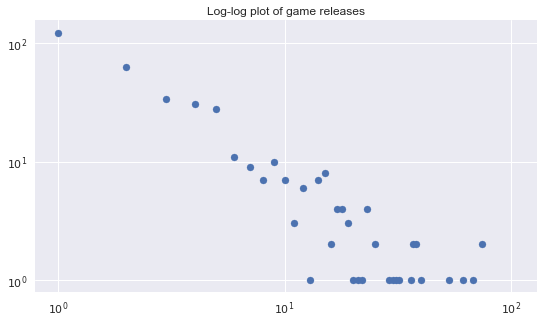

2768


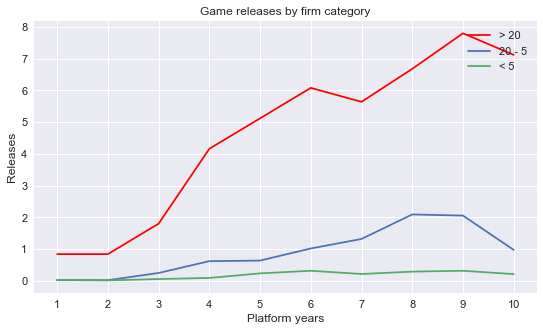

Results for generation 5
15 firms with more than 20 releases
77 firms between 5 and 20
549 firms with less than 5 releases


                1           2           3           4           5           6  \
count  641.000000  641.000000  641.000000  641.000000  641.000000  641.000000   
mean     0.057722    0.444618    0.778471    0.574103    0.324493    0.040562   
std      0.372626    1.770542    2.699694    1.849295    1.461220    0.276545   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
max      6.000000   34.000000   47.000000   32.000000   26.000000    5.000000   

                7      8           9          10          11    Releases  \
count  641.000000  641.0  641.000000  641.000000  641.000000  641.000

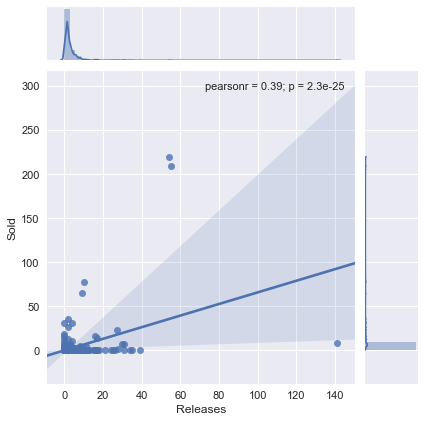

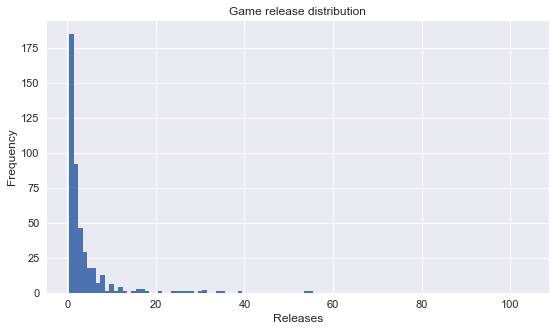

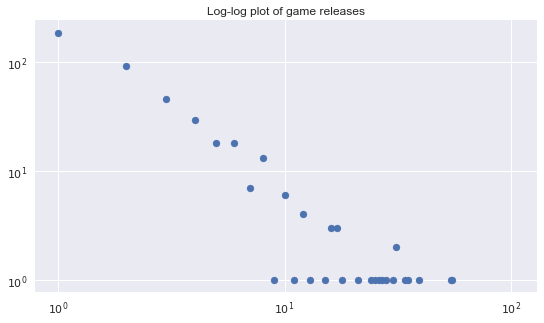

1848


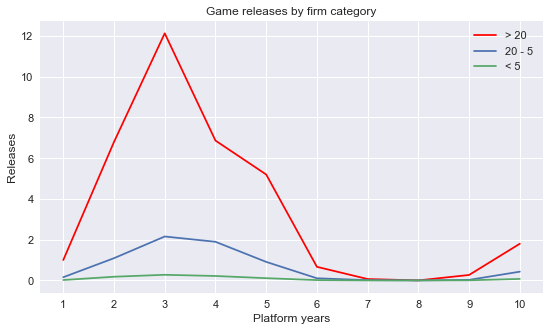

Results for generation 6
66 firms with more than 20 releases
136 firms between 5 and 20
375 firms with less than 5 releases


                1          2           3           4           5           6  \
count  581.000000  581.00000  581.000000  581.000000  581.000000  581.000000   
mean     0.234079    1.19105    1.746988    1.583477    1.454389    1.170396   
std      0.937867    3.06757    4.272568    4.006288    3.701361    3.283745   
min      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.00000    1.000000    1.000000    1.000000    1.000000   
max     12.000000   34.00000   61.000000   47.000000   38.000000   33.000000   

                7           8           9          10          11    Releases  \
count  581.000000  581.000000  581.000000  581.000000  581.000000  581.0

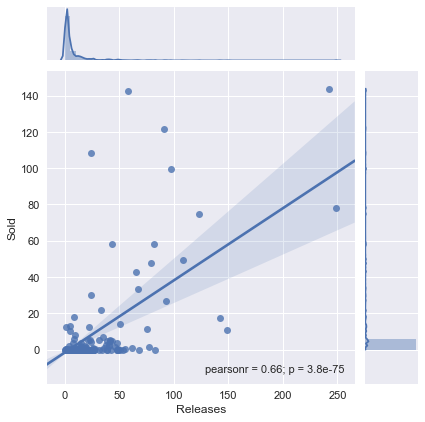

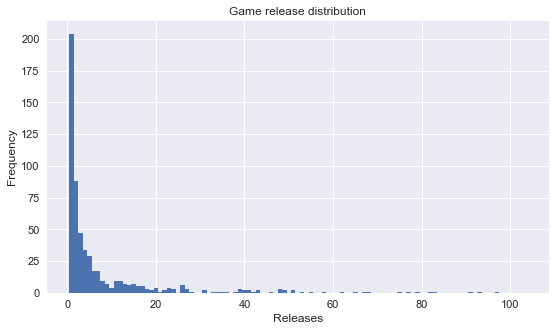

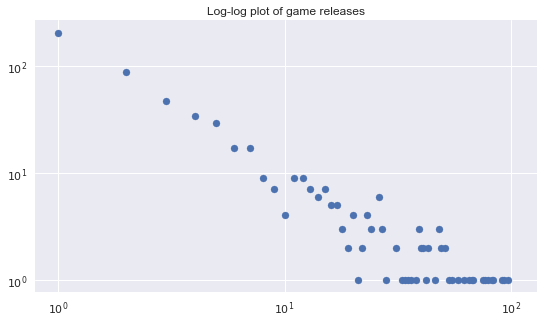

5669


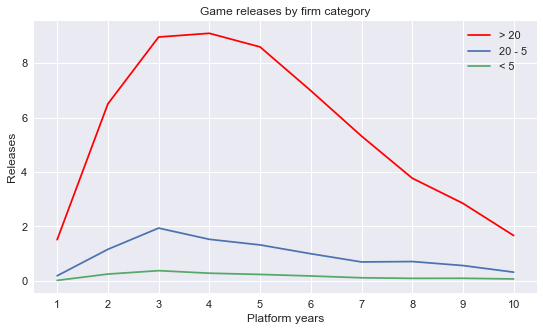

Results for generation 7
26 firms with more than 20 releases
72 firms between 5 and 20
170 firms with less than 5 releases


                1           2           3           4           5      6  \
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.0   
mean     0.304833    1.464684    2.301115    2.706320    0.702602    0.0   
std      0.895686    2.872226    4.017968    4.467878    2.177058    0.0   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
50%      0.000000    0.000000    1.000000    1.000000    0.000000    0.0   
75%      0.000000    1.000000    3.000000    3.000000    0.000000    0.0   
max      7.000000   16.000000   28.000000   32.000000   21.000000    0.0   

           7      8      9     10     11    Releases        Sold  
count  269.0  269.0  269.0  269.0  269.0  269.000000  269.000000  
mean     0.0    0.0    0.0    0.0    0.0    7.479554    

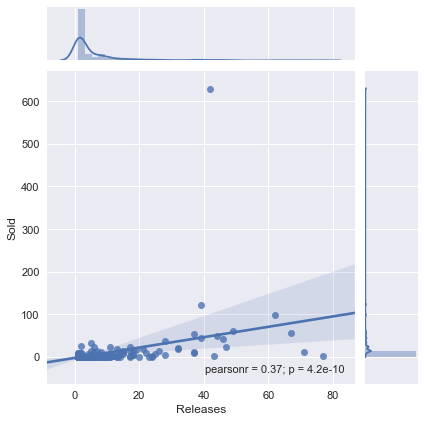

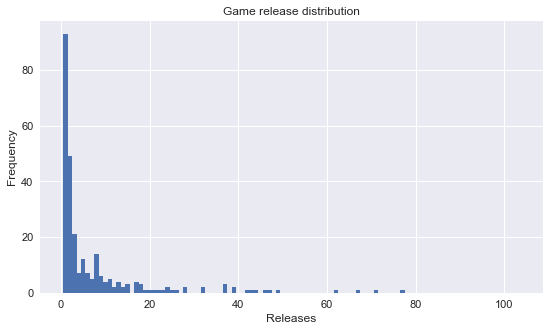

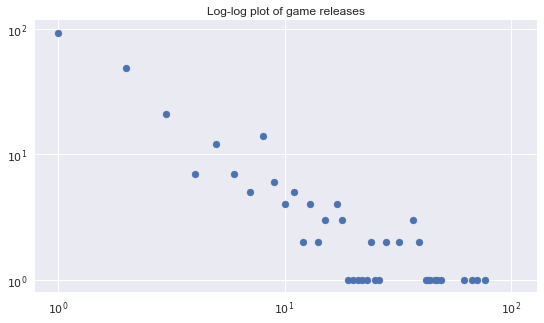

2012


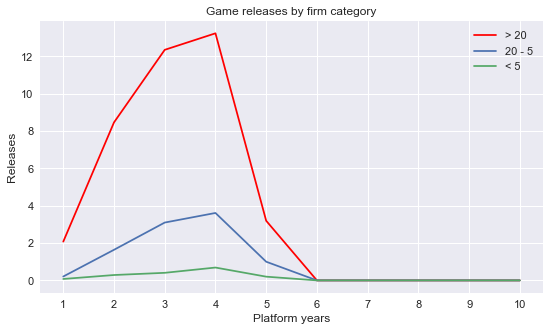

In [40]:
avgs = [get_developer_behavior(generations[i],g=i) for i in range(2,8)]

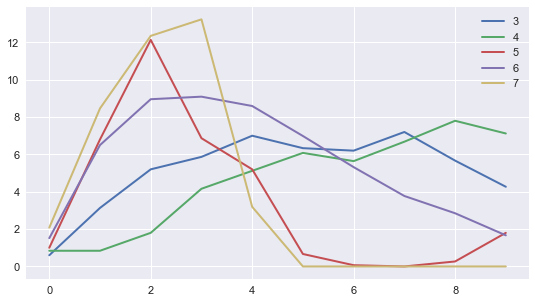

In [36]:
g = 3
for i in avgs[1:]:
    plt.plot(i,label=str(g),linewidth=2)
    g+=1
plt.legend()
plt.show()

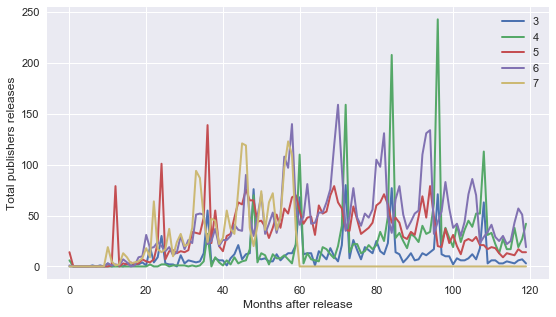

In [37]:
for g in range(3,8):
    gen6 = data[data.Console.isin(generations[g])]
    gen6_rel = []
    gen6yrs = [i for i in list(gen6.Year) if i > 1983]
    if g == 5:
        gen6yrs = [i for i in list(gen6.Year) if i > 1990]
    for y in range(min(gen6yrs),min(gen6yrs)+10):
        for m in range(1,13):
            gy = gen6[gen6.Year == y]
            gm = gy[gy.Month == m]
            gen6_rel.append(len(gm))
    plt.plot(gen6_rel,label=g,linewidth=2)
plt.legend()
plt.xlabel('Months after release')
plt.ylabel('Total publishers releases')
plt.show()

1978


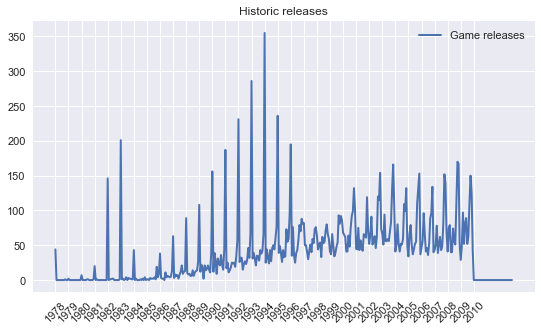

In [15]:
gen6 = data[data.Console.isin(home_console)]
gen6_rel = []
gen6yrs = [i for i in list(gen6.Year) if i > 1977]
print min(gen6yrs)
for y in range(min(gen6yrs),min(gen6yrs)+35):
    for m in range(1,13):
        gy = gen6[gen6.Year == y]
        gm = gy[gy.Month == m]
        gen6_rel.append(len(gm))
plt.title('Historic releases')
plt.plot(gen6_rel,linewidth=2,label='Game releases')
plt.legend()
plt.xticks(np.arange(0,385,12),np.arange(1978,2011),rotation=45)
plt.show()

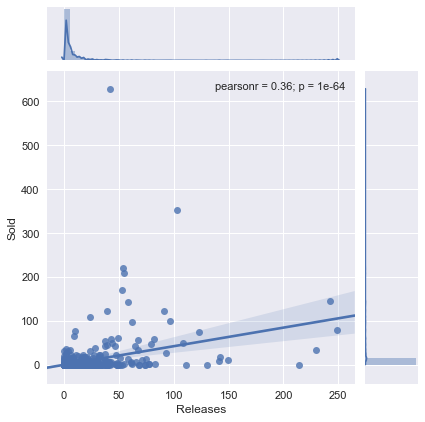

In [44]:
hcdata = tdf[tdf.Console.isin(home_console)]
sns.jointplot('Releases','Sold',data=hcdata,kind='reg')